In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_palette(sns.color_palette("hls", 10))

In [2]:
%run to_csv.py lulesh2.0.8.7917.1.mpiP

/home/jovyan/work/experiments/mpip/results/to_csv.py: lulesh2.0.8.7917.1.mpiP.csv already exists, skipping.


In [3]:
df = pd.read_csv('lulesh2.0.8.7917.1.mpiP.csv')

In [4]:
df

,Rank,AppTime,MPITime,MPI-pct,Allreduce_Count,Allreduce_Sum,Reduce_Count,Reduce_Sum,Isend_Count,Isend_Sum,...,Barrier_Count,Barrier_MPI-pct,Isend_Count.1,Isend_MPI-pct,Allreduce_Count.1,Allreduce_MPI-pct,Wait_Count,Wait_MPI-pct,Waitall_Count,Waitall_MPI-pct
0,AllRanks,0.779,0.555,71.17,72,576,8,64,21,728,...,8,3.56,21,0.01,72,35.92,11,0.03,248,0.08


In [5]:
df.iloc[0]['Allreduce_MPI-pct'] * df.iloc[0]['AppTime']

27.981680000000001

In [6]:
cols=["Machine", "Allreduce", "Reduce", "Ircv", "Barrier", "Isend", "Wait", "Waitall"]
new_df = pd.DataFrame([[
    "dwill",
    (df.iloc[0]['Allreduce_MPI-pct'] * df.iloc[0]['AppTime']),
    (df.iloc[0]['Reduce_MPI-pct'] * df.iloc[0]['AppTime']),
    (df.iloc[0]['Irecv_MPI-pct'] * df.iloc[0]['AppTime']),
    (df.iloc[0]['Isend_MPI-pct'] * df.iloc[0]['AppTime']),
    (df.iloc[0]['Wait_MPI-pct'] * df.iloc[0]['AppTime']),
    (df.iloc[0]['Waitall_MPI-pct'] * df.iloc[0]['AppTime']),
    (df.iloc[0]['Barrier_MPI-pct'] * df.iloc[0]['AppTime'])]], columns=cols)

In [7]:
new_df

,Machine,Allreduce,Reduce,Ircv,Barrier,Isend,Wait,Waitall
0,dwill,27.98168,0.48298,0.0,0.00779,0.02337,0.06232,2.77324


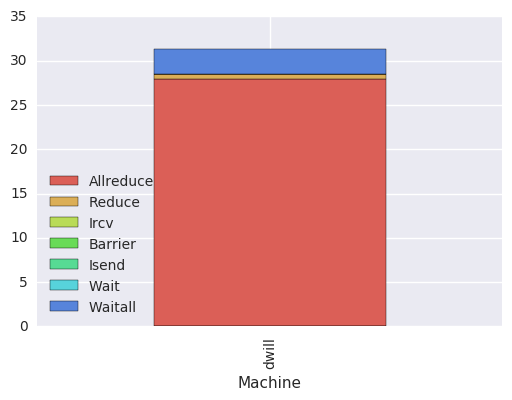

In [8]:
new_df.groupby('Machine').sum().plot.bar(stacked=True)